In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


In [47]:
df=pd.read_csv("C:/Users/Vishaal Grizzly/Downloads/cars_class.csv")

In [48]:
df.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [49]:
# df.tail()

# Data Cleaning

In [50]:
df.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [51]:
df.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

We can see columns are repeated here, proceeding to drop them

In [52]:
df = df.drop_duplicates()

In [53]:
df.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

We can drop the ID column as it won't serve much use in this scenario

In [55]:
df = df.drop(columns = 'ID')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 718
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Comp          719 non-null    int64
 1   Circ          719 non-null    int64
 2   D.Circ        719 non-null    int64
 3   Rad.Ra        719 non-null    int64
 4   Pr.Axis.Ra    719 non-null    int64
 5   Max.L.Ra      719 non-null    int64
 6   Scat.Ra       719 non-null    int64
 7   Elong         719 non-null    int64
 8   Pr.Axis.Rect  719 non-null    int64
 9   Max.L.Rect    719 non-null    int64
 10  Sc.Var.Maxis  719 non-null    int64
 11  Sc.Var.maxis  719 non-null    int64
 12  Ra.Gyr        719 non-null    int64
 13  Skew.Maxis    719 non-null    int64
 14  Skew.maxis    719 non-null    int64
 15  Kurt.maxis    719 non-null    int64
 16  Kurt.Maxis    719 non-null    int64
 17  Holl.Ra       719 non-null    int64
 18  Class         719 non-null    int64
dtypes: int64(19)
memory usage: 11

As the data is already clean, we need not have to perform any other actions

# EDA

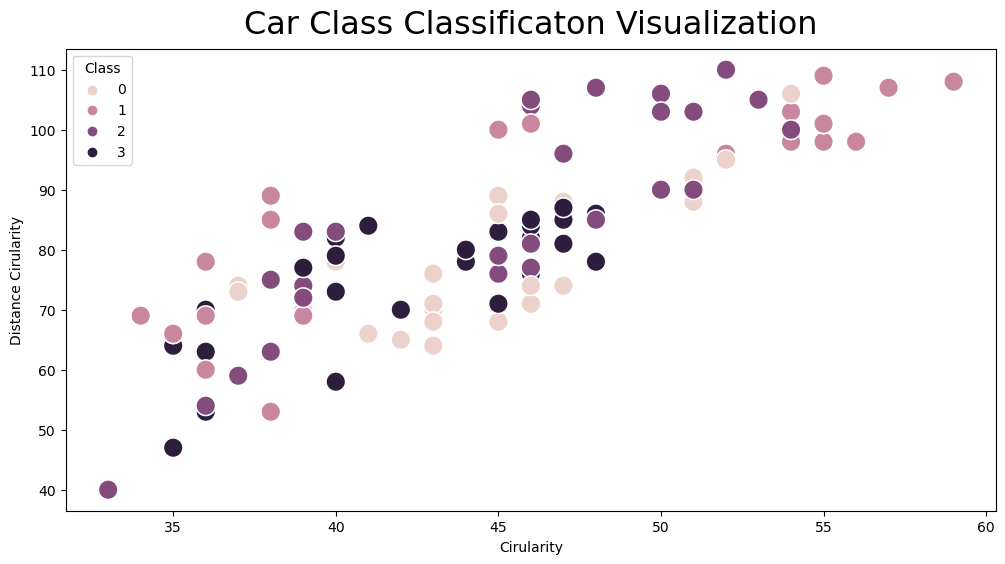

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Circ', y='D.Circ', hue='Class', data=df.head(100), s=200)
plt.title("Car Class Classificaton Visualization", y=1.015, fontsize=23)
plt.xlabel("Cirularity")
plt.ylabel("Distance Cirularity")
ax = plt.gca()

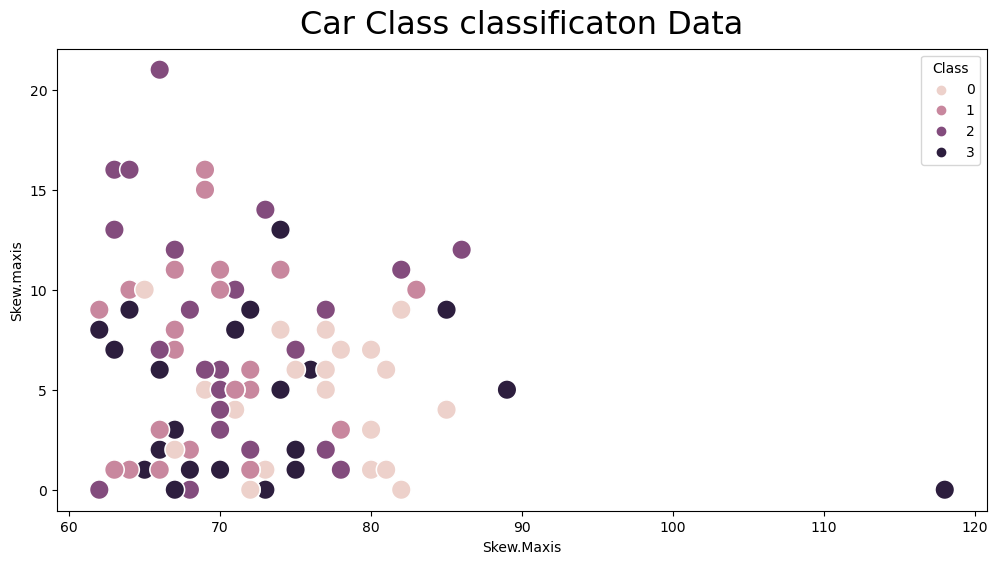

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Skew.Maxis', y='Skew.maxis', hue='Class', data=df.head(100), s=200)
plt.title("Car Class classificaton Data", y=1.015, fontsize=23)
plt.xlabel("Skew.Maxis")
plt.ylabel("Skew.maxis")
ax = plt.gca()

In [59]:
df['Class'].value_counts()

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

The class column seems pretty balanced

In [60]:
df.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


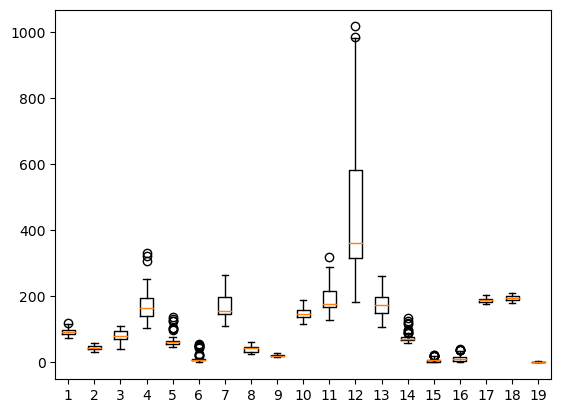

In [61]:
plt.boxplot(df)
plt.show()

It seems like there are some outliers

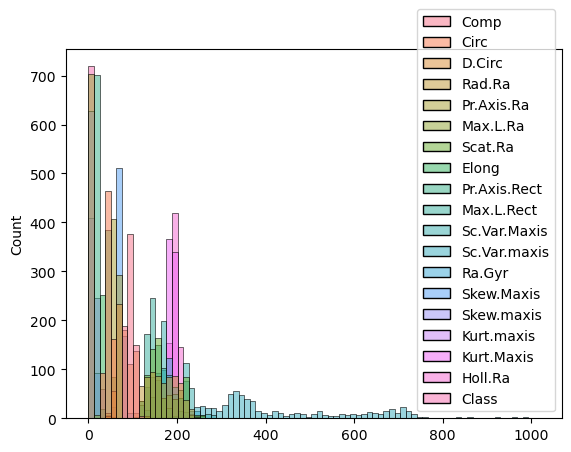

In [62]:
sns.histplot(df)
plt.show()

In [63]:
#Spilitting data for processing
X = df.drop(columns = 'Class')
Y = df.Class

In [64]:
X.shape

(719, 18)

In [65]:
Y.shape

(719,)

In [112]:
#Assigning the test size in data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [113]:
 X_train.shape

(575, 18)

In [114]:
Y_train.shape

(575,)

In [115]:
X_test.shape

(144, 18)

In [116]:
Y_test.shape

(144,)

# Scaling the data

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scale=sc.fit_transform(X_train)
X_test_scale=sc.transform(X_test)

In [118]:
X_train_scale.shape

(575, 18)

In [119]:
X_test_scale.shape

(144, 18)

In [120]:
X_train_scale.mean()

1.5017509511837866e-16

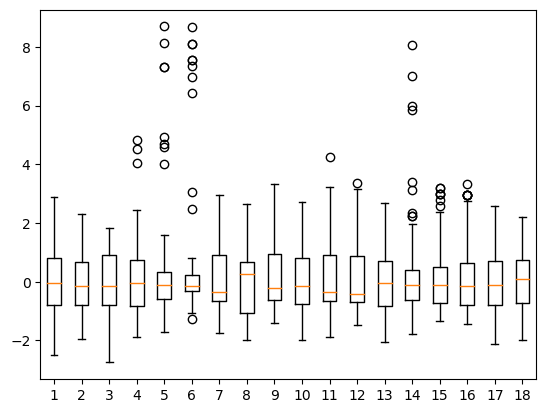

In [121]:
#Plotting box plot and histoplot
plt.boxplot(X_train_scale)
plt.show()

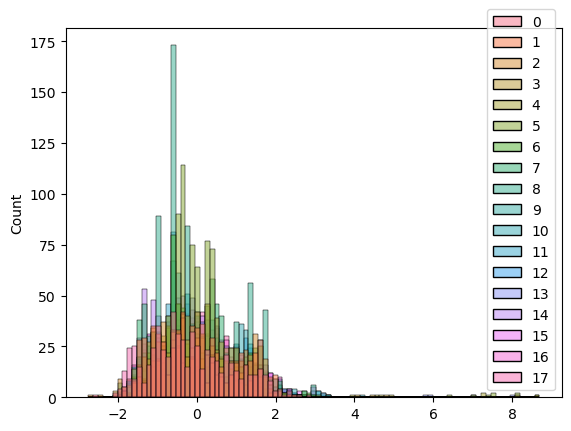

In [122]:
sns.histplot(X_train_scale)
plt.show()

# Building ML model 

Let's begin with building K-nearest neighbour model

In [125]:
knn = KNeighborsClassifier(4)
knn.fit(X_train_scale,Y_train)
knn_score=knn.score(X_test_scale,Y_test)
print("The Accuracy level = ",knn_score, "   ","The f1_score is = ",f1_score(Y_test,knn.predict(X_test_scale),average='macro'))

The Accuracy level =  0.7222222222222222     The f1_score is =  0.6996933621933622


C:\Users\Vishaal Grizzly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vishaal Grizzly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Confusion matrix

C:\Users\Vishaal Grizzly\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


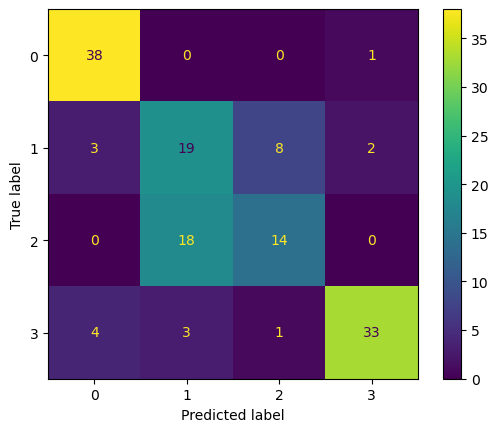

In [126]:
cm = confusion_matrix(Y_test,knn.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# SVM

Now let's move on with support vector mechanism

In [127]:
svc=SVC()
svc.fit(X_train_scale,Y_train)
svc_score=svc.score(X_test_scale,Y_test)
print("Accuracy:",svc_score, "   ","f1_score:",f1_score(Y_test,svc.predict(X_test_scale),average='macro'))

Accuracy: 0.7847222222222222     f1_score: 0.7621118774268613


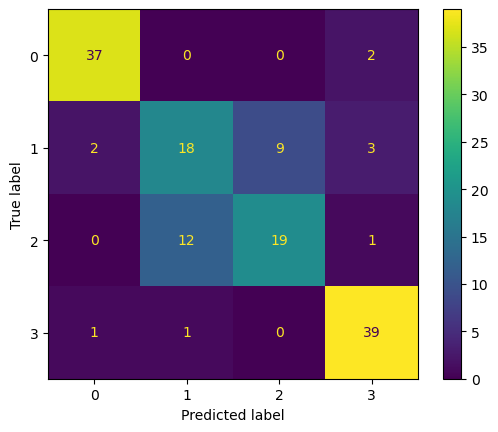

In [128]:
cm = confusion_matrix(Y_test,svc.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# RFC

Now let's move on wuth Random foresh classifier

In [129]:
RND=RandomForestClassifier()
RND.fit(X_train_scale,Y_train)
RND_score=RND.score(X_test_scale,Y_test)
print("Accuracy:",RND_score, "   ","f1_score:",f1_score(Y_test,RND.predict(X_test_scale),average='macro'))

Accuracy: 0.7847222222222222     f1_score: 0.7654748024355486


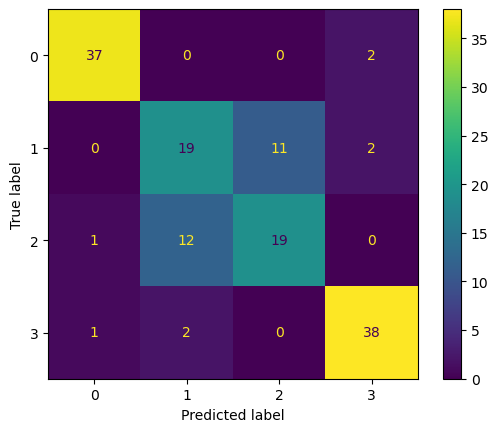

In [130]:
cm = confusion_matrix(Y_test,RND.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# GBC

Now let us move on Gradient Boosting Classifier technique

In [131]:
GB=GradientBoostingClassifier()
GB.fit(X_train_scale,Y_train)
GB_score=GB.score(X_test_scale,Y_test)
print("Accuracy:",GB_score, "   ","f1_score:",f1_score(Y_test,GB.predict(X_test_scale),average='macro'))

Accuracy: 0.7916666666666666     f1_score: 0.7763471096804431


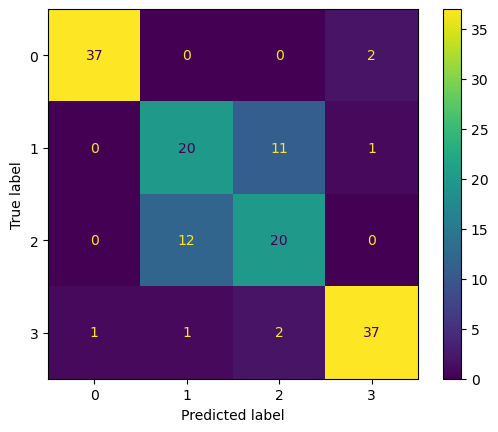

In [132]:
cm = confusion_matrix(Y_test,GB.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Final model

Gradient boosting has given the best F1 score and confusion matrix. We further proceed to tune the hyperparameter of the model

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
print(gb.get_params().keys())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [134]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5]}
  
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train_scale, Y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [135]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}

In [136]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=300)

In [141]:
GBC_new = GradientBoostingClassifier(learning_rate=0.07, n_estimators=300, max_depth = 4)
GBC_new.fit(X_train_scale, Y_train)
GBC_score = GBC_new.score(X_test_scale, Y_test)

print("Accuracy:", GBC_score)
print("f1_score:", f1_score(Y_test, GBC_new.predict(X_test_scale), average='macro'))

Accuracy: 0.7777777777777778
f1_score: 0.7566992168456375


In [149]:
print(classification_report(Y_test, GB.predict(X_test_scale))) #without tuning

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.61      0.62      0.62        32
           2       0.61      0.62      0.62        32
           3       0.93      0.90      0.91        41

    accuracy                           0.79       144
   macro avg       0.78      0.78      0.78       144
weighted avg       0.80      0.79      0.79       144



In [150]:
print(classification_report(Y_test, GBC_new.predict(X_test_scale))) #with tuning

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.54      0.59      0.57        32
           2       0.59      0.53      0.56        32
           3       0.91      0.95      0.93        41

    accuracy                           0.78       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.78      0.78      0.78       144



In [138]:
# defining parameter range
param_grid = {'learning_rate': [0.1, 0.05, 0.01, 0.09, 0.08, 0.07],
              'n_estimators': [100, 200, 300, 400, 500]}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True)

# fitting the model for grid search
grid.fit(X_train_scale, Y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.07, 'n_estimators': 300}
GradientBoostingClassifier(learning_rate=0.07, n_estimators=300)


In [142]:
svc_new=SVC(C=1000,gamma=0.01,kernel='rbf')
svc_new.fit(X_train_scale,Y_train)
svc_score=svc_new.score(X_test_scale,Y_test)
print("Accuracy:",svc_score, "   ","f1_score:",f1_score(Y_test,svc_new.predict(X_test_scale),average='macro'))

Accuracy: 0.8611111111111112     f1_score: 0.8499680849407625


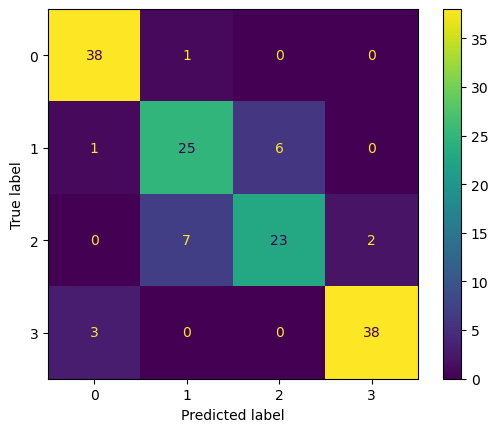

In [144]:
cm = confusion_matrix(Y_test,svc_new.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [146]:
print(classification_report(Y_test, svc.predict(X_test_scale))) #without tuning

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.58      0.56      0.57        32
           2       0.68      0.59      0.63        32
           3       0.87      0.95      0.91        41

    accuracy                           0.78       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.78      0.78      0.78       144



In [148]:
print(classification_report(Y_test, svc_new.predict(X_test_scale))) #with tuning

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.76      0.78      0.77        32
           2       0.79      0.72      0.75        32
           3       0.95      0.93      0.94        41

    accuracy                           0.86       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.86      0.86      0.86       144

